Fehler C_X 791.923677579545
CX=  0.772727272727273
Fehler nu_gr 54.1022773673549
nu_gr=  1061.03295394597


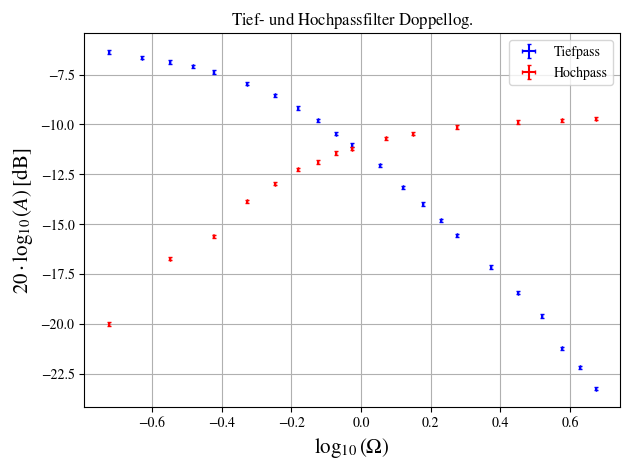

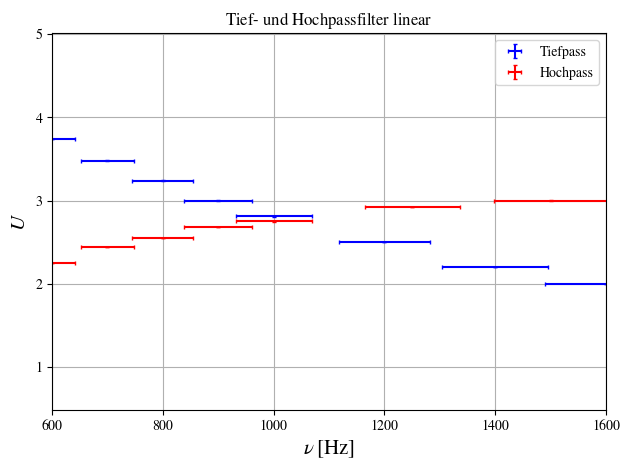

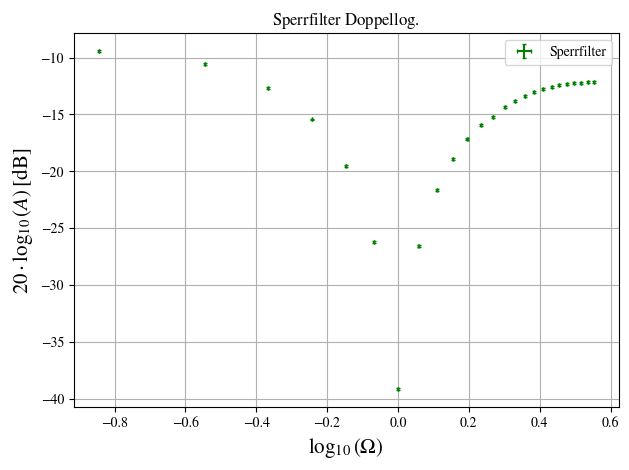

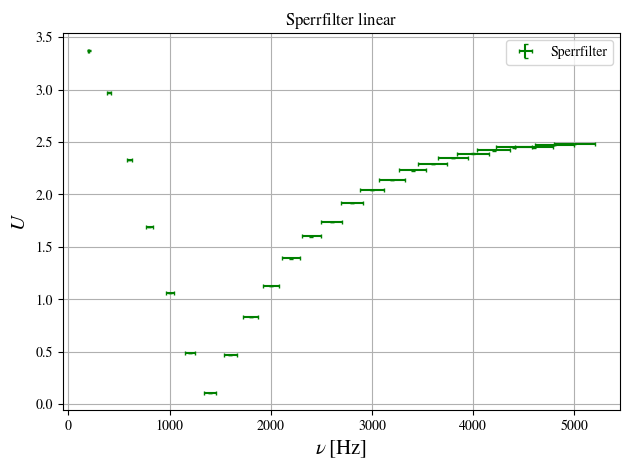

Q_theo Fehler:  0.1149586915722776
Fehler L (c)=  0.13595280605113647
L=  1000.00000000000
0.00143
U_E=  0.17062109793869443
xval=  0.0014279985806725229    yval=  7.563103593932263e-05
xval=  0.05646616424827199    yval=  0.02028724464009771
xval=  0.030545314061877313    yval=  0.005289970591721766
xval=  0.019881617238148686    yval=  0.002172854342967065
xval=  0.013959650535151334    yval=  0.0010621473233267292
xval=  0.009985422732775086    yval=  0.0005397525801500045
xval=  0.007992530561788683    yval=  0.00034562294321248096
xval=  0.005996846899233374    yval=  0.00019449233186702835
xval=  0.004998194411283109    yval=  0.00013436006481943845
xval=  0.003999075358286335    yval=  8.600162060830766e-05
xval=  0.0029996098575963987    yval=  4.8380804154780215e-05
xval=  2.3023359823970242e-17    yval=  0.0


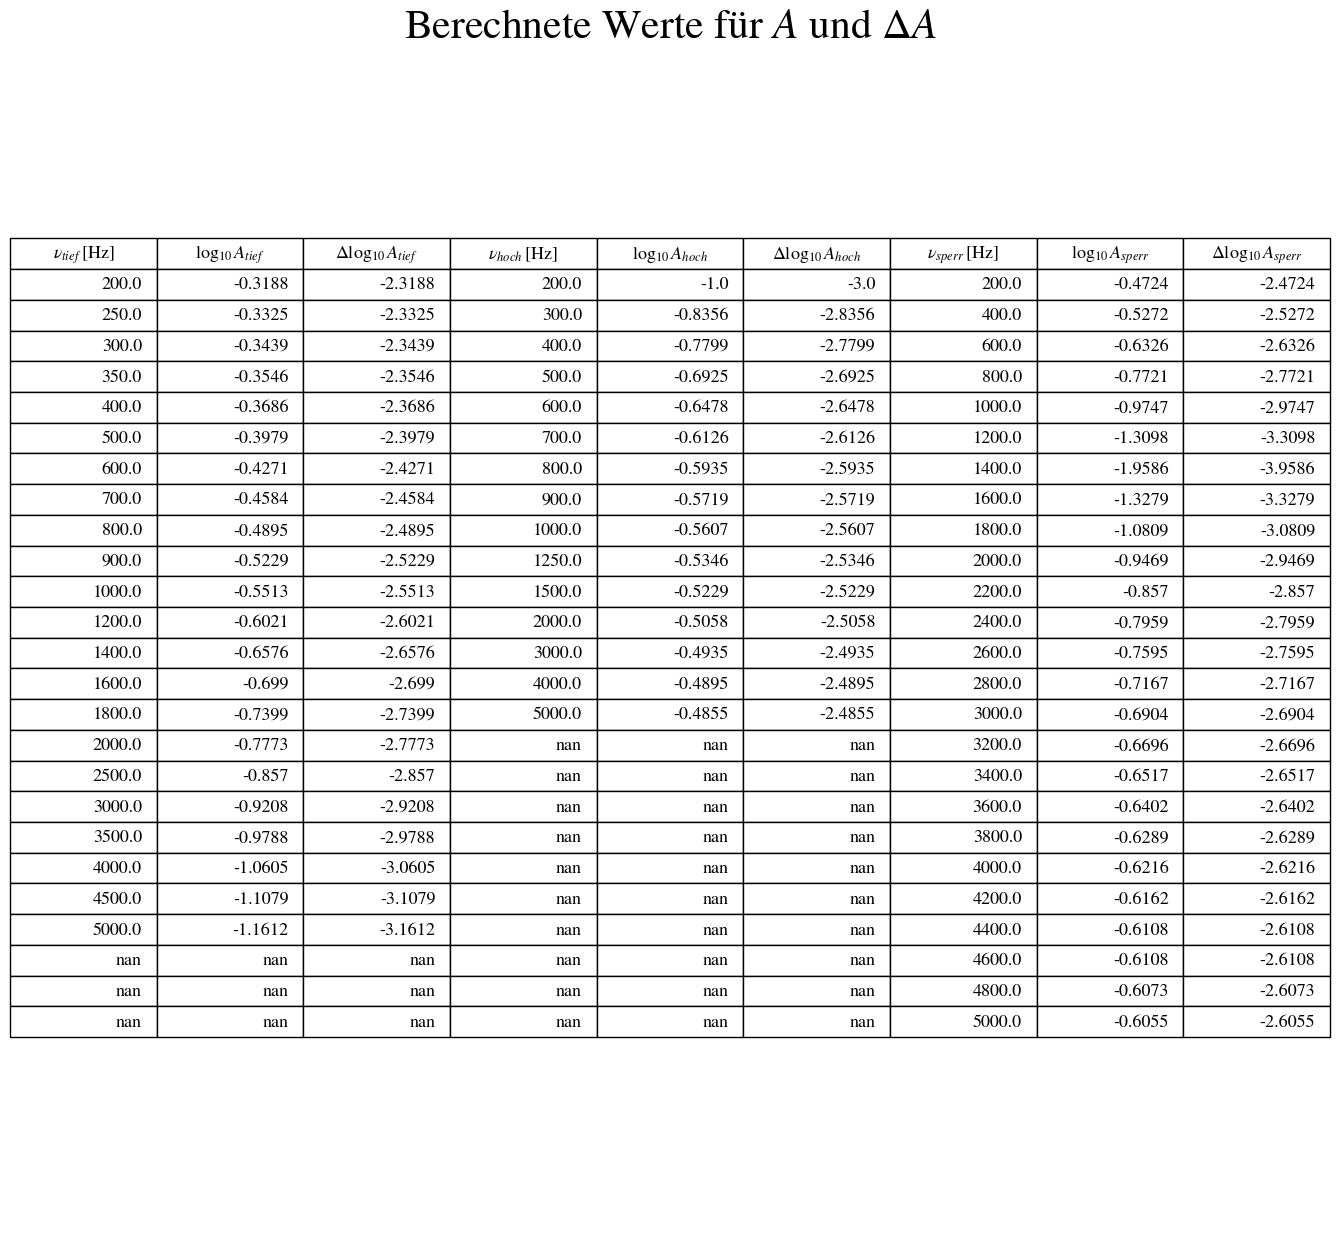

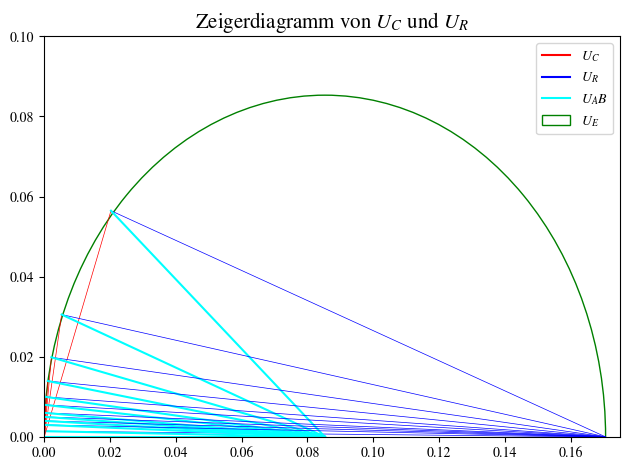

U_AB=  0.07268300827396959


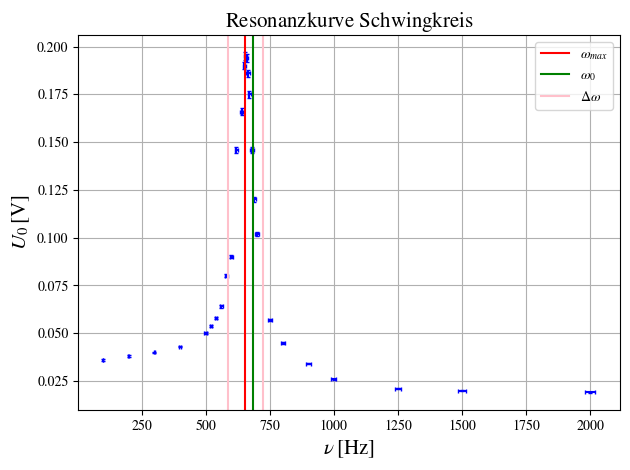

w_0 Fehler =  30.42903097250923
Q1 Fehler =  0.13788582233137678
Q2 Fehler =  0.4497233063424717
Q3 Fehler =  0.4297415208442687


In [3]:
import sympy as sp
import numpy as np
from typing import List, Tuple
import matplotlib.pyplot as plt
from tabulate import tabulate

import os
from os import listdir
from os.path import isfile, join

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'



def calcErr(f: sp.Expr, values: List[float], errorL: List[float]) -> Tuple[sp.Function, float]:
    """
    Calculate error using Gaussian error propagation.
    
    Parameters:
    -----------
    f : sympy.Expr
        Symbolic function for which error needs to be calculated
    values : List[float]
        List of values for each variable in the function
    errorL : List[float]
        List of uncertainties for each variable in the function
        
    Returns:
    --------
    Tuple[sp.Function, float]
        - Symbolic error propagation function
        - Numerical result of error calculation
    """
    # Get variables in the function
    vars = list(f.free_symbols)
    
    if not (len(vars) == len(errorL) == len(values)):
        raise ValueError("Number of values and errors must match number of variables in function")
    
    # Create symbolic error variables
    error_symbols = [sp.Symbol(f'Δ{var}') for var in vars]
    
    # Create symbolic error propagation function
    error_expr = sp.sqrt(sum((sp.diff(f, var) * err)**2 
                           for var, err in zip(vars, error_symbols)))
    # Convert to sp.Function
    error_func = sp.Function('σ')(*error_symbols)
    
    error_func = error_func.subs(error_func, error_expr)
    
    # Print the symbolic error propagation function
    # print("\nSymbolic error propagation function:")
    # print(f"{error_func.simplify()}")
    
    # Calculate numerical result using the provided values
    numerical_error = error_expr.subs(dict(zip(error_symbols, errorL)))
    result = float(numerical_error.evalf(subs=dict(zip(vars, values))))
    
    return result

def find_error_func(f: sp.Expr) -> sp.Function:
    """
    Creates symbolic error propagation function for given function f.
    
    Parameters:
    -----------
    f : sympy.Expr
        Symbolic function for which error propagation function is needed
        
    Returns:
    --------
    sp.Function
        Symbolic error propagation function
    """
    # Get variables in the function
    vars = list(f.free_symbols)
    
    # Create symbolic error variables
    error_symbols = [sp.Symbol(f'Δ{var}') for var in vars]
    
    # Create symbolic error propagation function
    error_expr = sp.sqrt(sum((sp.diff(f, var) * err)**2 
                           for var, err in zip(vars, error_symbols)))
    
    # Convert to sp.Function
    error_func = sp.Function('σ')(*error_symbols)
    error_func = error_func.subs(error_func, error_expr)
    
    return error_func

def plot_table(columns, col_names, filename, title):
    """
    Plots a table from a list of numpy arrays (columns) and saves it as a PNG file.
    
    Parameters:
    columns (list of numpy.ndarray): The data to be plotted in the table, where each element is a column.
    col_names (list of str): The names of the columns.
    filename (str, optional): The name of the output PNG file.
    """
    # Get the maximum number of rows
    max_rows = max(len(col) for col in columns)
    
    # Create a 2D numpy array to hold the data
    data = np.full((max_rows, len(columns)), np.nan)
    
    # Fill the data array with the input columns
    for i, col in enumerate(columns):
        data[:len(col), i] = col
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(len(columns) * 1.5, max_rows * 0.5))
    ax.axis('tight')
    ax.axis('off')
    
    # Create the table
    the_table = ax.table(cellText=data.astype(str),
                        colLabels=col_names,
                        loc='center')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(13)
    the_table.scale(1, 1.5)
    
    # Save the figure
    plt.title(title, fontsize=30)
    plt.tight_layout()
    plt.savefig(filename, dpi=300)

def b():
    
    L1, R2, RB, R1, RA = sp.symbols('L_1 R_2 R_B R_1 R_A')
    values = [20, 40, 1000, 32, 20]
    errors = [0.001, 0.002, 0.03, 0.0234, 0.01235]
    
    L2 = L1 * (R2 - RB) / (R1 + RA)
    return calcErr(L2, values, errors)

def c():
    U_RL, nu, I, R = sp.symbols('U_RL nu I R')
    values = [1.112, 1000, 0.067, 1.6]
    errors = [0.01 * values[0], 1, 0.01 * values[2], 0.1]
    L = (sp.sqrt((U_RL**2) * ((R * I)**2)) / (2*sp.pi*nu*I))
    find_error_func(L).simplify()
    print("Fehler L (c)= " , calcErr(L, values, errors))
    print("L= ", nu.evalf(subs={U_RL:values[0], nu:values[1], I:values[2], R:values[3]}))

def d():

    source = "Data/234d.csv"
    data = np.genfromtxt(source, delimiter=' ')
    
    dataU = data[:,1:]
    print(dataU[0][1])
    fig, ax = plt.subplots()

    U_E = np.sqrt((dataU[:,0].mean()**2)+(dataU[:,1].mean()**2))
    U_AB = 0
    print("U_E= ", U_E)
    for i in (dataU):
        sinphi = (i[1]/np.sqrt(i[0]**2 + i[1]**2))
        yval = sinphi * i[1]
        theta = np.pi - np.arcsin(sinphi)
        xval = np.sin(theta) * i[0]
        gamma = np.pi - theta - np.arcsin(sinphi)

        print("xval= ", xval, "   yval= ", yval)
        plt.plot([0,yval], [0, xval], color='red', linewidth=0.5)
        plt.plot([U_E, yval], [0, xval], color='blue', linewidth=0.5)
        plt.plot([U_E/2, yval], [0, xval], color='cyan')
        U_AB+= np.sqrt((U_E/2 - xval)**2+(yval)**2)
        
    plt.plot(0,0, color='red', label=r'$U_C$')
    plt.plot(0,0, color='blue', label=r'$U_R$')
    plt.plot(0,0, color='cyan', label=r'$U_AB$')
    circle1 = plt.Circle((U_E/2, 0), U_E/2, color='green', fill=False, label=r'$U_E$')
    ax.add_patch(circle1)
    plt.xlim(0, 0.175)
    plt.ylim(0, 0.1)
    plt.autoscale(False)
    plt.legend()
    plt.title(r"$\text{Zeigerdiagramm von } U_C \text{ und } U_R$", fontsize=15)
    plt.tight_layout()
    plt.savefig('Figures/Zeigerdiag.pdf', format='pdf',  dpi=1200)
    plt.show()
    print("U_AB= ", U_AB/len(dataU[:,1]))

def plot(source, target, xlabel, ylabel):

    data = np.genfromtxt(source, delimiter=' ')
    plt.grid()
    plt.scatter(data[:,0], data[:, 1], marker="+")
    
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.tight_layout()

def plotlog(source, target, xlabel, ylabel, logs):

    data = np.genfromtxt(source, delimiter=' ')
    plt.grid()
    if(logs == 2):
        plt.scatter(np.log10(data[:,0]), np.log10(data[:, 1]), marker="+")
        
    if(logs == 1):
        plt.scatter((data[:,0]), np.log10(data[:, 1]), marker="+")
        
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.tight_layout()

def j():
    source = "Data/234j.csv"
    f, U = sp.symbols('f U')
    data = np.genfromtxt(source, delimiter=' ')
    values = [data[:,0], data[:,1]]
    xerrors = 0.01 * data[:,0]
    yerrors = 0.01 * data[:,1] / 1000
    
    w_max = 4116

    plt.errorbar(data[:,0], data[:,1] / 1000, yerr=yerrors, xerr=xerrors, ls='none', capsize=1.5, ecolor='blue')
    plt.xlabel(r'$\nu \: \left[ \text{Hz} \right]$', fontsize=15)
    plt.ylabel(r'$U_0 \: \left[ \text{V} \right]$', fontsize=15)
    plt.grid()
    plt.axvline(x=4116/(2*np.pi) + 70, color='pink')

    plt.axvline(x=4116/(2*np.pi), color='red', label=r'$\omega_{max}$')
    plt.axvline(x=4303/(2*np.pi), color='green', label=r'$\omega_{0}$')
    plt.axvline(x=4116/(2*np.pi) - 70, color='pink', label=r'$\Delta \omega$')

    plt.title(r'$\text{Resonanzkurve Schwingkreis}$', fontsize=15)
    plt.legend()
    plt.tight_layout()
    plt.savefig('Figures/Resonanzkurve.pdf', format='pdf',  dpi=1200)
    plt.show()

    L, C = sp.symbols(' L C')
    values = [36e-3, 1.5e-6]
    errors = [values[0] * 0.01, values[1] * 0.01]

    w = 1/sp.sqrt(L*C)

    print("w_0 Fehler = ", calcErr(w, values, errors))
    find_error_func(w)

    U1, U2 = sp.symbols('U1 U2')
    values = [195, 20]
    errors = [values[0] * 0.01, values[1] * 0.01]

    Q1 = U1/U2

    print("Q1 Fehler = ", calcErr(Q1, values, errors))

    w0, dw = sp.symbols('w0 dw')
    values = [4303, 440]
    errors = [30, 20]

    Q2 = w0/dw

    print("Q2 Fehler = ", calcErr(Q2, values, errors))

    w0, L, RL = sp.symbols('w0 L RL')
    values = [4303, 39e-3, 9.5]
    errors = [30, values[1]*0.01, 0.2]

    Q3 = w0 * L / RL

    print("Q3 Fehler = ", calcErr(Q3, values, errors))

def f():
    data_tief = np.genfromtxt("Data/234f_tief.csv", delimiter=' ')
    data_hoch = np.genfromtxt("Data/234f_hoch.csv", delimiter=' ')
    data_sperr = np.genfromtxt("Data/234f_sperr.csv", delimiter=' ')

    
    R = 100
    C = 1.5e-6
    U_E = 10
    nu_gr_val = 1 / (2*np.pi * R*C)
    nu_sperr = 1400

    R, C = sp.symbols('R C')
    nu = 1 / (2*np.pi * R *C)
    values = [100, 1.5e-6]
    errors = [0.05 * values[0], 0.01 * values[1]]
    find_error_func(nu).simplify()
    print("Fehler nu_gr" , calcErr(nu, values, errors))
    l = calcErr(nu, values, errors)
    print("nu_gr= ", nu.evalf(subs={R:values[0], C:values[1]}))

    nu_gr_er = nu.evalf(subs={R:values[0], C:values[1]})

    freq = sp.symbols('f')
    Omega_func = freq / nu_gr_val

    values = data_tief[:,0]
    errors = 0.01 * data_tief[:,0]
    
    Omega_tief_err = np.sqrt((values*l / nu_gr_val**2)**2 + (nu_gr_val * errors /  nu_gr_val**2)**2)

    values = data_hoch[:,0]
    errors = 0.01 * values
    Omega_hoch_err = np.sqrt((values*l / nu_gr_val**2)**2 + (nu_gr_val * errors /  nu_gr_val**2)**2)

    nu_0 = 1400

    values = data_sperr[:,0]
    errors = 0.01 * values
    Omega_sperr_err = np.sqrt((values*l / nu_0**2)**2 + (nu_0 * errors /  nu_0**2)**2)


    Omega_tief = data_tief[:,0] / nu_gr_val
    Omega_hoch = data_hoch[:,0] / nu_gr_val
    Omega_sperr = data_sperr[:,0] / nu_sperr

    A_tief = data_tief[:,1] / U_E
    A_hoch = data_hoch[:,1] / U_E
    A_sperr = data_sperr[:,1] / U_E

    A_tief_err = (1/U_E) * data_tief[:,1] * 0.01
    A_hoch_err = (1/U_E) * data_hoch[:,1] * 0.01
    A_sperr_err = (1/U_E) * data_sperr[:,1] * 0.01 

    plt.errorbar(np.log10(Omega_tief), 20*np.log10(A_tief), xerr=(Omega_tief_err/(nu_gr_val * np.log(10) * Omega_tief)), yerr=(20*A_tief_err/(np.log(10)*A_tief)), ls='', capsize=1.5, ecolor='blue', label='Tiefpass')
    plt.errorbar(np.log10(Omega_hoch), 20*np.log10(A_hoch), xerr=(Omega_hoch_err/(nu_gr_val * np.log(10) * Omega_hoch)), ls='', yerr=(20*A_hoch_err/(np.log(10) * A_hoch)), capsize=1.5, ecolor='red', label="Hochpass")
    plt.legend()
    plt.xlabel(r'$\log_{10} (\Omega)$', fontsize=15)
    plt.ylabel(r'$20 \cdot \log_{10} (A) \: \left[ \text{dB} \right]$', fontsize=15)
    plt.grid()
    plt.title(r'$\text{Tief- und Hochpassfilter Doppellog.}$')
    plt.tight_layout()
    plt.savefig('Figures/TiefHochLog.pdf', format='pdf',  dpi=1200)
    plt.show()

    plt.errorbar((Omega_tief*nu_gr_val), (A_tief)*U_E, xerr=(Omega_tief_err)*nu_0, yerr=(A_tief_err), ls='', capsize=1.5, ecolor='blue', label='Tiefpass')
    plt.errorbar((Omega_hoch*nu_gr_val), (A_hoch)*U_E, xerr=(Omega_hoch_err)*nu_0, ls='', yerr=(A_hoch_err), capsize=1.5, ecolor='red', label='Hochpass')
    plt.legend()
    plt.xlabel(r'$\nu \: \left[ \text{Hz} \right]$', fontsize=15)
    plt.ylabel(r'$U$', fontsize=15)
    plt.xlim(600, 1600)
    plt.title(r'$\text{Tief- und Hochpassfilter linear}$')
    plt.grid()
    plt.tight_layout()
    plt.savefig('Figures/TiefHochLin.pdf', format='pdf',  dpi=1200)
    plt.show()

    plt.errorbar(np.log10(Omega_sperr), 20*np.log10(A_sperr), xerr=(Omega_sperr_err/(nu_0* np.log(10) * Omega_sperr)), yerr=(20*A_sperr_err/(np.log(10)*A_sperr)), ls='', capsize=1.5, label="Sperrfilter", ecolor='green')
    plt.legend()
    plt.xlabel(r'$\log_{10} (\Omega)$', fontsize=15)
    plt.ylabel(r'$20 \cdot \log_{10} (A) \: \left[ \text{dB} \right]$', fontsize=15)
    plt.grid()
    plt.title(r'$\text{Sperrfilter Doppellog.}$')
    plt.tight_layout()
    plt.savefig('Figures/SperrLog.pdf', format='pdf',  dpi=1200)
    plt.show()

    plt.errorbar((Omega_sperr)*nu_0, (A_sperr)*U_E, xerr=(Omega_sperr_err)*nu_0, yerr=(A_sperr_err), ls='', capsize=1.5, label="Sperrfilter", ecolor='green')
    plt.legend()
    plt.xlabel(r'$\nu \: \left[ \text{Hz} \right]$', fontsize=15)
    plt.ylabel(r'$U$', fontsize=15)
    plt.grid()
    plt.title(r'$\text{Sperrfilter linear}$')
    plt.tight_layout()
    plt.savefig('Figures/SperrLinear.pdf', format='pdf',  dpi=1200)
    plt.show()

    R, C, w0 = sp.symbols('R C w0')
    Q_theo = 1 / (w0 * R *C)
    values = [100, 1.5e-6, 2*np.pi*1400]
    errors = [0.05 * values[0], 0.01 * values[1], 200*2*np.pi]
    find_error_func(Q_theo).simplify()
    print("Q_theo Fehler: ", calcErr(Q_theo, values, errors))

    data_total = [data_tief[:,0], np.round(np.log10(A_tief), 4), np.round(np.log10(A_tief_err), 4), data_hoch[:,0], np.round(np.log10(A_hoch), 4), np.round(np.log10(A_hoch_err), 4), data_sperr[:,0], np.round(np.log10(A_sperr), 4), np.round(np.log10(A_sperr_err), 4)]

    plot_table(data_total, [r"$\nu_{tief} \: \left[ \text{Hz} \right]$", r"$\log_{10} A_{tief}$", r"$\Delta \log_{10} A_{tief}$",  r"$\nu_{hoch} \: \left[ \text{Hz} \right]$", r"$\log_{10} A_{hoch}$", r"$\Delta \log_{10} A_{hoch}$", r"$\nu_{sperr} \: \left[ \text{Hz} \right]$", r"$\log_{10} A_{sperr}$", r"$\Delta \log_{10} A_{sperr}$"], filename="Figures/table.pdf",  title=r"Berechnete Werte für $A$ und $\Delta A$")
        

    
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'


def a():
    RX, RY, C1 = sp.symbols('R_X R_Y C_1')
    CX = C1 * RX / RY
    values = [0.34 * 200, 0.66 * 200, 1.5]
    errors = [0.04 * 200, 0.04 * 200, 0]
    find_error_func(CX).simplify()
    print("Fehler C_X" , calcErr(CX, values, errors))
    print("CX= ", CX.evalf(subs={RX:values[0], RY:values[1], C1:values[2]}))

def b():
    L1, R1, R2 = sp.symbols('L_1 R_X R_Y')
    LX = L1 * R2/R1
    values = [4.74, 0.375 * 200, 0.525 * 200]
    errors = [0.02 * values[0], 0.04 * 200, 0.04 * 200]
    return find_error_func(LX)
    print("Fehler L_X" , calcErr(LX, values, errors))
    print("LX= " , LX.evalf(subs={L1:values[0], R1:values[1], R2:values[2]}))



a()
b()
f()
c()
d()
j()